<a href="https://colab.research.google.com/github/raghavxi1/Fire_Detection_Model/blob/main/Fire_Detection_Model_Using_RF_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Dataset Shape: (2900, 32)
Columns found: ['Unnamed: 0', 'Date', 'Sensor_ID', 'CO2_Room', 'CO_Room', 'H2_Room', 'Humidity_Room', 'PM05_Room', 'PM100_Room', 'PM10_Room', 'PM25_Room', 'PM40_Room', 'PM_Room_Typical_Size', 'PM_Total_Room', 'Temperature_Room', 'VOC_Room', 'VOC_Room_RAW', 'scenario_label', 'class', 'number_label', 'UV_Room', 'Interval_label', 'CO2_Room_Trend', 'CO_Room_Trend', 'H2_Room_Trend', 'PM05_Room_Trend', 'PM10_Room_Trend', 'PM25_Room_Trend', 'PM40_Room_Trend', 'PM100_Room_Trend', 'PM_Room_Typical_Size_Trend', 'VOC_Room_RAW_Trend']

Features used for training:
['CO2_Room', 'CO_Room', 'H2_Room', 'Humidity_Room', 'PM05_Room', 'PM100_Room', 'PM10_Room', 'PM25_Room', 'PM40_Room', 'PM_Room_Typical_Size', 'PM_Total_Room', 'Temperature_Room', 'VOC_Room', 'VOC_Room_RAW', 'CO2_Room_Trend', 'CO_Room_Trend', 'H2_Room_Trend', 'PM05_Room_Trend', 'PM10_Room_Trend', 'PM25_Room_Trend', 'PM40_Room_Trend', 'PM100_Room_Trend', 'PM_Room_Typical_Size_Trend', 'VOC_Room_RAW_Trend']


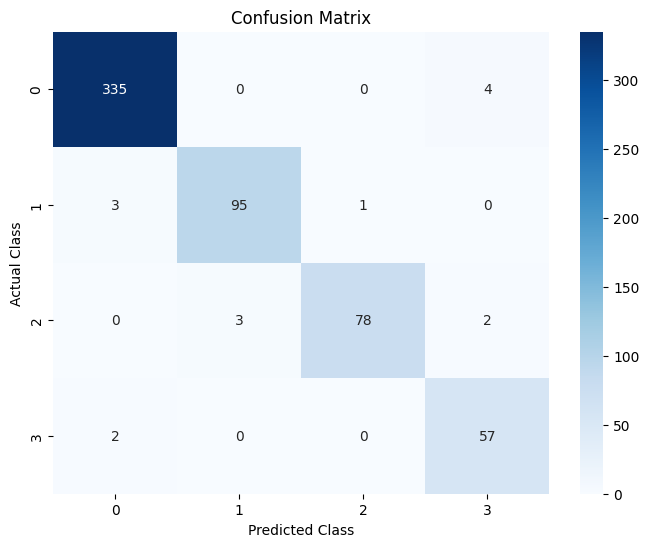

In [4]:
# --- 1. Imports ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# --- 2. Load the Dataset ---
file_path = 'Laboratory Fire Dataset containing Multi Sensor Data.csv'
df = pd.read_csv(file_path)

# --- CRITICAL FIX: Clean Column Names ---
# This removes hidden spaces (e.g. " class " -> "class")
df.columns = df.columns.str.strip()

print("Original Dataset Shape:", df.shape)
print("Columns found:", df.columns.tolist()) # Verifies the columns are correct

# --- 3. Data Cleaning & Feature Selection ---

# Columns to DROP
# Note: We use 'errors=ignore' so if a column is missing, the code won't crash
cols_to_drop = [
    'Unnamed: 0',
    'Date',
    'Sensor_ID',
    'scenario_label',
    'number_label',
    'UV_Room',
    'Interval_label'
]

# Drop the columns
df_clean = df.drop(columns=cols_to_drop, errors='ignore')

# Check if 'class' exists before proceeding
if 'class' not in df_clean.columns:
    raise ValueError(f"Error: The column 'class' was not found. Available columns are: {df_clean.columns.tolist()}")

# Separate Input Features (X) and Target Label (y)
X = df_clean.drop(columns=['class'])
y = df_clean['class']

print("\nFeatures used for training:")
print(list(X.columns))

# --- 4. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 5. Train the Model (Random Forest) ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

print("\nTraining the model...")
rf_model.fit(X_train, y_train)
print("Training complete!")

# --- 6. Evaluation ---
y_pred = rf_model.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {acc * 100:.2f}%")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()